<a href="https://colab.research.google.com/github/yebiny/Lecture_deeplearning_basic/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression
* 앞서 선형 회귀 챕터에서 공부 시간과 성적간의 관계를 직선으로 표현한다는 가설 하에 주어진 데이터로부터 가중치를 찾아 이진분류입니다. 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

## 1. 개념정리
---

## 2. Sigmoid funtion
----

## <center>$H(x) = \frac{1}{1+e^{(-x)}} = \sigma(x)$</center>

* 시그모이드 함수는 입력값이 커지면 1에 수렴하고, 입력값이 작아지면 0에 수렴합니다. 0부터 1까지의 값을 가지는데 출력값이 0.5 이상이면 1(True), 0.5이하면 0(False)로 만들면 이진 분류 문제로 사용할 수 있습니다.



<center> e(e=2.718281..): 자연 상수

* 시그모이드 함수 구현

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

* 함수 그리기

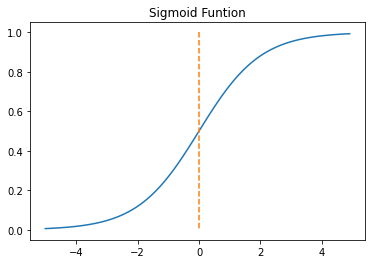

In [ ]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

plt.title('Sigmoid Funtion')
plt.plot(x, y)
plt.plot([0,0], [1,0], linestyle='--')
plt.show()

* W 변화에 따른 시그모이드 함수

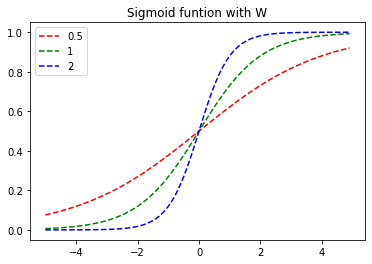

In [ ]:
W_list = [0.5, 1, 2]
color_list = ['r','g','b']

plt.title("Sigmoid funtion with W")
for W , color in zip(W_list, color_list):
  x = np.arange(-5, 5, 0.1)
  z = W*x
  y = sigmoid(z)
  plt.plot(x, y, 'r', linestyle='--', color=color)
plt.legend(W_list)
plt.show()

* b 변화에 따른 시그모이드 함수

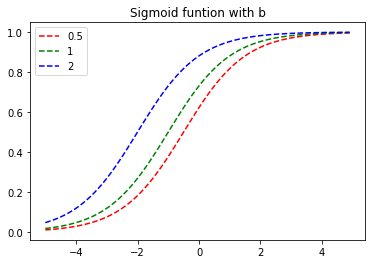

In [ ]:
b_list = [0.5, 1, 2]
color_list = ['r','g','b']

plt.title("Sigmoid funtion with b")
for b , color in zip(b_list, color_list):
  x = np.arange(-5, 5, 0.1)
  z = x+b
  y = sigmoid(z)
  plt.plot(x, y, 'r', linestyle='--', color=color)
plt.legend(b_list)
plt.show()

## 3. Cross Entropy
---


## <center>$J(W) = -\frac{1}{n}\sum_{i=1}^{n}[y^{(i)}log(\hat{y}^{(i)})+(1-y^{(i)})log(1-\hat{y}^{(i)})]$</center>


<center> $y = 1 \rightarrow cost(y, \hat{y}) = -log(\hat{y})$</center>
<center> $y = 0 \rightarrow cost(y, \hat{y}) = -log(1-\hat{y})$</center>


In [ ]:
def J_yis1(y_pred):
  return -(np.log10(y_pred))

def J_yis0(y_pred):
  return -(np.log10(1-y_pred))

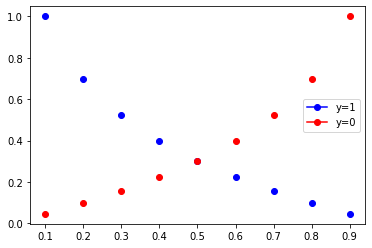

In [ ]:
y_pred_range = np.arange(0.1,1,0.1)
for y_pred in y_pred_range:
  j = J_yis1(y_pred)
  plt.plot(y_pred, j, marker='o', color='b')
  
  j = J_yis0(y_pred)
  plt.plot(y_pred, j, marker='o', color='r')

  plt.legend(["y=1", "y=0"])


## 4, 실습
---

### 데이터
|공부시간|집중도|수면시간|종합성적|합격여부|
|------|---|---|---|---|
|0|1|9|0|불합격|
|1|1|8.5|11|불합격|
|2|2|8|23|불합격|
|3|4|8|30|불합격|
|4|3|7|44|불합격|
|5|5|7.5|55|합격|
|6|6|7|61|합격|
|7|6|6|73|합격|
|8|7|7|84|합격|
|9|6|6.5|98|합격|

In [ ]:
x = [[0,1,9],
      [1,1,8.5],
      [2,2,8],
      [3,4,8],
      [4,3,7],
      [5,5,7.5],
      [6,6,7],
      [7,6,6],
      [8,7,7],
      [9,6,6.5 ]
     ]
y = [0,0,0,0,0,1,1,1,1,1]

* 

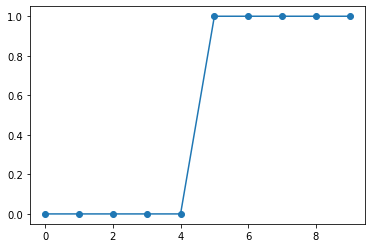

In [ ]:
plt.plot(y, marker='o')
plt.show()

####  모델 생성

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=3, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


* 학습 파라미터 확인

In [ ]:
print(model.get_weights())
W = model.get_weights()[0]
b = model.get_weights()[1]
print("W:",W, "b:", b)

[array([[-0.36023462],
       [-0.8481941 ],
       [ 1.1291    ]], dtype=float32), array([0.], dtype=float32)]
W: [[-0.36023462]
 [-0.8481941 ]
 [ 1.1291    ]] b: [0.]


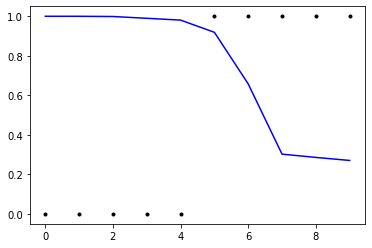

In [ ]:
plt.plot(np.array(x)[:,0], model.predict(x), 'b', np.array(x)[:,0],y, 'k.')

#### 학습

In [ ]:
model.compile(optimizer = optimizers.SGD(lr=0.01),
              loss = 'binary_crossentropy',
              metrics=['acc']
              )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.fit(x, y, epochs=300)

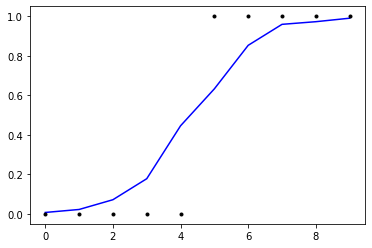

In [ ]:
plt.plot(np.array(x)[:,0], model.predict(x), 'b', np.array(x)[:,0],y, 'k.')